# LB02: Линейные модели и задача классификации

<div style="text-align: right"> ПСА 5 (Введение в машинное обучение). Мехмат, БГУ</div>
    
<div style="text-align: right"> Тишуров Алексей, 2021 </div>

Данный материал использует лицензию [Creative Commons CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/) со всеми вытекающими. На прилагаемые к материалу датасеты лицензия не распостраняется. 

# Введение

В данной лабораторной работе вам предлагается на практике познакомиться с задачей классификации, алгоритмом "логистическая регрессия" и пакетом для машинного обучения scikit-learn. Также вы разберетесь с тем, как проверять и оценивать качество предсказаний, а также делать простейшую инженерию признаков

Мы будем решать задачу предсказания оттока пользователей для телеком-оператора. Необходимо предсказать, перестанет ли пользоваться услугами абонент с некоторым набором характеристик.

Звездочками отмечены опциональные задания.

В тексте заданий присутствуют вопросы, на которые нужно усно, вычислительно или графически ответить. Также вы должны знать значения **всех** параметров алгоритмов/функций/классовой, которые используете не по умолчанию. Для этого достаточно не забывать про официальную документацию sklearn: https://scikit-learn.org/stable/index.html

# Задание 1. Смотрим на данные

Загрузите датасет из файла dataset.csv и проведите минимальный анализ того, что в нем происходит:
1. Сколько данных?
2. Сколько признаков?
3. Какие есть признаки? Что они означают? Колонки в датасете имеют довольно "говорящие" названия, однако их описание "кто-то потерял". Придется разобраться.
4. В какой колонке находится целевая переменная?
5. Есть ли какие-то явные взаимосвязи между признаками?
6. Какое типы признаков есть в данных?
7. Есть ли пропуски в данных?
8. Как выглядят распределения признаков? Есть ли в них явные выбросы?
9. Сбалансированы ли классы в целевой переменной?

Полезные функции: df.info(), df.describe(), df.corr(), pd.plotting.scatter() и все ваши навыки из прошлой лабы.

In [2]:
import pandas as pd
import numpy as np
#для отображения графиков внутри юпитера
%matplotlib inline 
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('dataset.csv')
df.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [153]:
df.columns

Index(['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6499 non-null   object 
 1   Gender             6499 non-null   int64  
 2   Senior Citizen     6499 non-null   int64  
 3   Partner            6499 non-null   object 
 4   Dependents         6499 non-null   object 
 5   Tenure             6499 non-null   int64  
 6   Phone Service      6499 non-null   object 
 7   Multiple Lines     6499 non-null   object 
 8   Internet Service   6499 non-null   object 
 9   Online Security    6499 non-null   object 
 10  Online Backup      6499 non-null   object 
 11  Device Protection  6499 non-null   object 
 12  Tech Support       6499 non-null   object 
 13  Streaming TV       6499 non-null   object 
 14  Streaming Movies   6499 non-null   object 
 15  Contract           6499 non-null   object 
 16  Paperless Billing  6499 

In [36]:
df.describe

<bound method NDFrame.describe of       CustomerID  Gender  Senior Citizen Partner Dependents  Tenure  \
0     7590-VHVEG       0               0     Yes         No       1   
1     5575-GNVDE       1               0      No         No      34   
2     3668-QPYBK       1               0      No         No       2   
3     7795-CFOCW       1               0      No         No      45   
4     9237-HQITU       0               0      No         No       2   
...          ...     ...             ...     ...        ...     ...   
6494  4310-KEDTB       0               0      No        Yes      26   
6495  7254-IQWOZ       1               0      No         No       1   
6496  2474-BRUCM       1               1     Yes         No      40   
6497  4062-HBMOS       1               0      No         No      52   
6498  0742-NXBGR       0               0      No         No       1   

     Phone Service    Multiple Lines Internet Service Online Security  ...  \
0               No  No phone servic

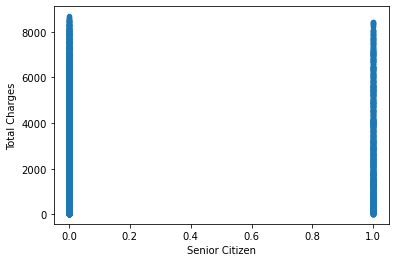

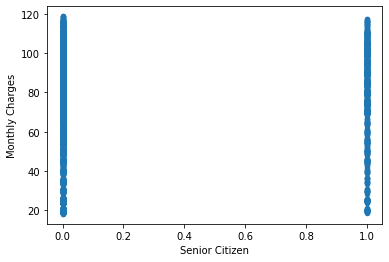

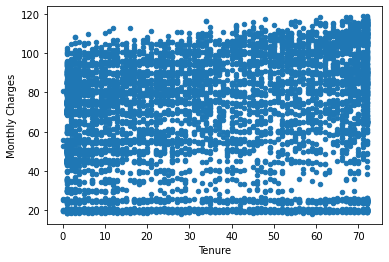

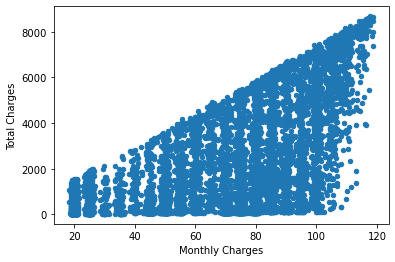

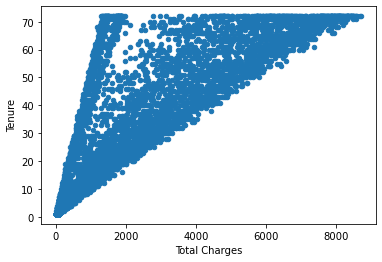

In [42]:
corr = df.corr().abs().unstack().sort_values(kind="quicksort").drop_duplicates()[-6:-1]
for i in corr.index:
    df.plot.scatter(x = i[0], y = i[1] )
plt.show()

In [349]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf[newdf.apply(lambda x: np.abs(x - x.mean()) / x.std() > 3).all(axis=1)]

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges


# Задание 2. Готовим данные к обучению

## Подготовка признаков

Преобразуйте датафрейм в X - матрицу признаков и y - вектор с целевой переменной. Для этого нужно:
1. Отделить от фрейма столбец с целевой переменной и преобразовать записи в нем из строк названий классов в числа 0 и 1. Если в данных есть пропуски, то заполнить их нулями
2. Убрать столбец CustomerID (но не забыть про него, он может понадобиться для некоторых описательных заданий)
3. Для категориальных признаков провести dummy кодирование с помощью pd.get_dummies(). Обратите внимание на параметр drop_first. Стоит ли его использовать?
4. Преобразовать фреймы в np.array с именами X и y соответственно
5. Преобразуйте матрицу признаков при помощи StandardScaler. Зачем мы это делаем?

In [405]:
Y = df['Churn'].values
Y = np.where(Y=='Yes', 1,Y ) 
Y = np.where(Y != 1, 0,Y ) 
Y = Y.astype('int') 
Y.size

6499

In [61]:
df[df['Total Charges'].isna()]

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,4472-LVYGI,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,1,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,0,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,0,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [65]:
df1 = df.drop(['CustomerID','Churn'],axis = 1)
X = pd.get_dummies(df1).values
np.argwhere(np.isnan(X))

array([[ 488,    4],
       [ 753,    4],
       [ 936,    4],
       [1082,    4],
       [1340,    4],
       [3331,    4],
       [3826,    4],
       [4380,    4],
       [5218,    4]])

In [67]:
X[np.isnan(X)]= 0

array([0, 0, 1, ..., 1, 0, 1])

## Разделение обучающей выборки


Разделите данные для обучения на тренировочные и тестовые с помощью train_test_split. Сравните, какое среднее значение получается y_train и y_test при параметре shuffle=True и shuffle=False. Как лучше? Почему?

Используйте test_size=0.2, random_state=42

Что означает random_state? Почему он равен 42?

Обратите внимание, что вы перемешиваете данные! Дальше по лабе это будет важно.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [112]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2, random_state=42)

In [111]:
train_test_split(X, Y, test_size=0.2, random_state=42, shuffle = False)

[array([[ 0.,  0.,  1., ...,  0.,  1.,  0.],
        [ 1.,  0., 34., ...,  0.,  0.,  1.],
        [ 1.,  0.,  2., ...,  0.,  0.,  1.],
        ...,
        [ 0.,  1., 66., ...,  0.,  0.,  0.],
        [ 0.,  0., 72., ...,  0.,  1.,  0.],
        [ 0.,  1., 47., ...,  0.,  1.,  0.]]),
 array([[ 0.,  0., 51., ...,  0.,  1.,  0.],
        [ 0.,  0., 70., ...,  0.,  1.,  0.],
        [ 1.,  0.,  9., ...,  0.,  1.,  0.],
        ...,
        [ 1.,  1., 40., ...,  0.,  1.,  0.],
        [ 1.,  0., 52., ...,  0.,  1.,  0.],
        [ 0.,  0.,  1., ...,  0.,  1.,  0.]]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 1, 0, 1])]

In [102]:
train_test_split(X, Y, test_size=0.2, random_state=42)

[array([[ 0.,  0., 64., ...,  0.,  0.,  1.],
        [ 1.,  0., 51., ...,  1.,  0.,  0.],
        [ 1.,  0., 72., ...,  1.,  0.,  0.],
        ...,
        [ 1.,  0., 12., ...,  0.,  1.,  0.],
        [ 1.,  1., 12., ...,  0.,  1.,  0.],
        [ 1.,  0., 26., ...,  1.,  0.,  0.]]),
 array([[ 1.,  0., 70., ...,  1.,  0.,  0.],
        [ 1.,  0., 11., ...,  0.,  1.,  0.],
        [ 0.,  0., 17., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  7., ...,  0.,  0.,  0.],
        [ 1.,  0., 10., ...,  0.,  0.,  1.],
        [ 0.,  0., 63., ...,  0.,  1.,  0.]]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 1, 0, 1])]

In [76]:
X_train

array([[ 0.,  0., 64., ...,  0.,  0.,  1.],
       [ 1.,  0., 51., ...,  1.,  0.,  0.],
       [ 1.,  0., 72., ...,  1.,  0.,  0.],
       ...,
       [ 1.,  0., 12., ...,  0.,  1.,  0.],
       [ 1.,  1., 12., ...,  0.,  1.,  0.],
       [ 1.,  0., 26., ...,  1.,  0.,  0.]])

# Задание 3. Обучение модели и оценка качества предсказаний

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    classification_report, roc_auc_score, plot_roc_curve

## Обучение модели

Обучите на тренировочных данных модель логистической регрессии с параметрами по умолчанию.


In [113]:
lR = LogisticRegression()

In [114]:
lR.fit(X_train, y_train)

LogisticRegression()

## Простые метрики

Проверьте качество модели на тестовых данных по метрикам на ваш выбор из тех, которые мы обсуждали на лекции. Поясните выбор метрик. Хорошее ли получилось качество классификации?

In [115]:
y_pred= lR.predict(X_test)
precision_score(y_test,y_pred)

0.627831715210356

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       955
           1       0.63      0.56      0.59       345

    accuracy                           0.80      1300
   macro avg       0.74      0.72      0.73      1300
weighted avg       0.79      0.80      0.79      1300



## Тестируем масштабирование данных

Проверьте, что будет, если не делать масштабирование данных с разными solver.  Почему так получается?

ВНИМАНИЕ! Для нас solver не принципиален. Тут важно понять, как будет вести себя модель в разных случаях при наличии/отсутствии стандартизации данных. 

In [126]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)
lR1 = LogisticRegression(solver = 'sag')
lR1.fit(X_train1, y_train1)
y_pred1= lR1.predict(X_test1)
precision_score(y_test1,y_pred1)

/Users/natalliazzz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.5454545454545454

In [127]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, Y, test_size=0.2, random_state=42)
lR2 = LogisticRegression(solver = 'sag')
lR2.fit(X_train2, y_train2)
y_pred2= lR2.predict(X_test2)
precision_score(y_test2,y_pred2)

0.627831715210356

## Шатаем параметры

Разберитесь, что означают параметры LogisticRegression и попробуйте улучшить качество, изменяя значения параметров, влияющих на модель. Удобно презентуйте полученные результаты(таблица, график и т.д.).

In [130]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new, Y, test_size=0.2, random_state=42)
lR3 = LogisticRegression(solver = 'saga', max_iter = 200)
lR3.fit(X_train3, y_train3)
y_pred3= lR3.predict(X_test3)
precision_score(y_test3,y_pred3)

0.627831715210356

In [132]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_new, Y, test_size=0.2, random_state=42)
lR4 = LogisticRegression(solver = 'saga', max_iter = 200,penalty = 'l1')
lR4.fit(X_train4, y_train4)
y_pred4= lR4.predict(X_test4)
precision_score(y_test4,y_pred4)

0.6298701298701299

In [134]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_new, Y, test_size=0.2, random_state=42)
lR5 = LogisticRegression(solver = 'saga', max_iter = 200,penalty = 'l1', C = 0.5)
lR5.fit(X_train5, y_train5)
y_pred5= lR5.predict(X_test5)
precision_score(y_test5,y_pred5)

0.6360655737704918

In [138]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_new, Y, test_size=0.2, random_state=42)
lR6 = LogisticRegression(solver = 'liblinear', max_iter = 200,penalty = 'l1', C = 0.5, tol = 1e-7)
lR6.fit(X_train6, y_train6)
y_pred6= lR6.predict(X_test6)
precision_score(y_test6,y_pred6)

0.6360655737704918

## ROC-кривая

Самостоятельно прочитайте про метрику ROC-AUC и разберитесь с тем, что она такое. Ссылки для ознакомления (**обратите особое внимание на то, от чего считается эта метрика. Вид предсказаний для остальных метрик и для roc_auc отличаются!**):
1. https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/
2. https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F

Нарисуйте ROC-кривую для вашего классификатора и вычислите ROC-AUC. Будьте готовы ответить на вопросы.


Вспомните курс "Нейронные сети и генетические алгоритмы", найдите в sklearn реализацию **линейного** варианта SVM и обучите на данных с параметрами по вашему выбору и сравните качество с логистической регрессией. 


Можно ли вычислять ROC-AUC для SVM без дополнительных модификаций и калибровок?

In [139]:
roc_auc_score(y_test, y_pred)

0.7209499962060855

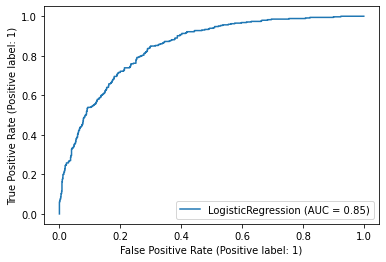

In [140]:
plot_roc_curve(lR, X_test, y_test) 

In [141]:
from sklearn import svm

In [142]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [293]:
precision_score(y_test,clf.predict(X_test))

0.6314102564102564

In [404]:
roc_auc_score(y_test, clf.predict(X_test))

ValueError: X.shape[1] = 108 should be equal to 44, the number of features at training time

In [ ]:
plot_roc_curve(, X_test, y_test) 

## Задание 3.5 * (Нужно выполнить, если нужна общая оценка 10)

Метрика Lift показывает во сколько раз полученная модель лучше случайного угадывания. [Теория](https://en.wikipedia.org/wiki/Lift_(data_mining))

Вам необходимо:
1. Разобраться с метрикой lift (и уметь ее объяснить):

    a. https://www.kdnuggets.com/2016/03/lift-analysis-data-scientist-secret-weapon.html
    
    b. https://stats.stackexchange.com/questions/17119/lift-measure-in-data-mining


2. Реализовать lift-score.

def lift_score(y_true, y_proba, top_ratio):

    pass

    a. y_true — вектор целевой переменной 
    b .y_proba — предсказание модели
    c. top_ratio — доля выборки, для которой рассчитывается lift-score


3.  Нарисовать Cumulative Lift Chart, т.е. изменение lift при варьировании параметра top_ratio

In [307]:
def P(arr):
    return np.count_nonzero(arr == 1)/arr.size


def lift_score(y_true, y_proba, top_ratio):
    y_t = np.random.choice(y_true, int(top_ratio/100* y_true.size))
    y_p = np.random.choice(y_proba, int(top_ratio/100* y_proba.size))
    return P(np.in1d(y_t, y_p))/(P(y_t)*P(y_p))

In [312]:
lift_score(y_test,y_pred,10)

17.139959432048677

In [280]:
lift_score(y_test,y_pred,x)

<BarContainer object of 10 artists>

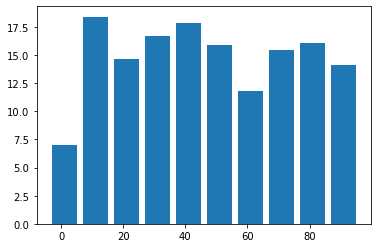

In [331]:
x_l = np.arange(1, 101,10)
plt.bar(x_l,[lift_score(y_test,y_pred,x) for x in x_l],8)

# Задание 4. Анализ предсказаний

Произведите анализ модели и предсказаний по трем направлениям. Задание считается выполненным, если есть **четкие ответы** на каждый из трех вопросов и **сопутствующий код**:

1. Важность признаков. Hint: используйте атрибут coef_ у логистической регрессии. 
- Как связаны веса модели и наличие/отсутсвие стандартизации данных? Какой вариант для наших объяснений правильный?
- Какие признаки получились самыми важными, а какие лишними?
- Как правильно посчитать значимость закодированных категориальных признаков?
2. Ищем крайних.
- Найдите 10 людей с самой высокой и самой низкой вероятностью уйти в отток.
- Попробуйте описать причины такого поведения
3. Подумайте, какую пользу может извлечь телеком-оператор из вашей модели. Опишите хотя бы один пример использования.

In [147]:
lR.coef_

array([[-3.79212296e-03,  8.06918060e-02, -1.46764860e+00,
        -7.01905235e-01,  6.79980631e-01, -2.67329618e-02,
         2.67329618e-02,  4.18066631e-02, -4.18066631e-02,
        -8.39420969e-05,  8.39420969e-05, -9.31456034e-02,
        -8.39420969e-05,  9.42785143e-02, -2.94891323e-01,
         3.61270892e-01, -9.56099264e-02,  1.23137465e-01,
        -9.56099264e-02, -4.86821245e-02,  6.34427815e-02,
        -9.56099264e-02,  1.69532370e-02,  2.25511000e-02,
        -9.56099264e-02,  5.96716329e-02,  1.04750622e-01,
        -9.56099264e-02, -2.83778875e-02, -5.12087298e-02,
        -9.56099264e-02,  1.32897308e-01, -7.32675561e-02,
        -9.56099264e-02,  1.54554656e-01,  2.72122549e-01,
        -1.12757057e-02, -3.05885692e-01, -9.16651600e-02,
         9.16651600e-02, -2.39574552e-02, -7.53672909e-02,
         1.11560399e-01, -2.79545035e-02]])

In [190]:
lR1.coef_

array([[8.50799744e-04, 4.58461043e-04, 4.30014141e-02, 6.00694386e-03,
        7.31318310e-06, 8.58296321e-04, 7.07084318e-04, 5.30110750e-04,
        1.03526989e-03, 1.82271362e-04, 1.38310928e-03, 1.73194974e-03,
        1.82271362e-04, 3.48840465e-04, 1.17224746e-03, 1.20436517e-03,
        1.59749835e-03, 7.15042674e-04, 1.59749835e-03, 6.82924960e-04,
        2.08193701e-04, 1.59749835e-03, 1.76075987e-04, 9.09712916e-05,
        1.59749835e-03, 5.88535772e-05, 6.35266647e-04, 1.59749835e-03,
        6.03148933e-04, 3.67021580e-04, 1.59749835e-03, 3.99139294e-04,
        4.52291376e-04, 1.59749835e-03, 4.84409090e-04, 9.21232004e-05,
        7.41630432e-04, 9.15873406e-04, 1.82060045e-03, 2.55219812e-04,
        4.79045938e-04, 5.96985817e-04, 7.14882026e-04, 1.20423091e-03]])

In [184]:
lR.coef_[0].size

44

In [186]:
pd.get_dummies(df1).columns.size

44

In [254]:
attr_weight = pd.DataFrame({'attribute':pd.get_dummies(df1).columns,'weight': abs(lR.coef_[0])}).sort_values(by = "weight")
print(attr_weight["attribute"].values[:10])
print(attr_weight["attribute"].values[-10:])

['Phone Service_Yes' 'Multiple Lines_No phone service' 'Phone Service_No'
 'Gender' 'Contract_One year' 'Online Backup_Yes' 'Device Protection_No'
 'Payment Method_Bank transfer (automatic)' 'Partner_Yes' 'Partner_No']
['Online Security_No' 'Streaming TV_Yes' 'Streaming Movies_Yes'
 'Contract_Month-to-month' 'Internet Service_DSL' 'Contract_Two year'
 'Internet Service_Fiber optic' 'Total Charges' 'Monthly Charges' 'Tenure']


In [209]:
lR.classes_

array([0, 1])

In [233]:
pd.get_dummies(df1).columns

Index(['Gender', 'Senior Citizen', 'Tenure', 'Monthly Charges',
       'Total Charges', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two y

In [236]:
lR.predict_proba(X_test)[:,1]

array([0.01192323, 0.41323097, 0.39424432, ..., 0.15640276, 0.44277745,
       0.20062556])

In [237]:
X_test

array([[ 0.98761325, -0.44046641,  1.53078024, ...,  1.90324272,
        -0.71094556, -0.54421569],
       [ 0.98761325, -0.44046641, -0.86927171, ..., -0.52541906,
         1.40657745, -0.54421569],
       [-1.0125421 , -0.44046641, -0.62519863, ..., -0.52541906,
        -0.71094556, -0.54421569],
       ...,
       [-1.0125421 , -0.44046641, -1.0319871 , ..., -0.52541906,
        -0.71094556, -0.54421569],
       [ 0.98761325, -0.44046641, -0.90995056, ..., -0.52541906,
        -0.71094556,  1.83750673],
       [-1.0125421 , -0.44046641,  1.24602831, ..., -0.52541906,
         1.40657745, -0.54421569]])

In [259]:
prob_df = pd.DataFrame(np.delete(np.append(X_test,lR.predict_proba(X_test), axis = 1),-2, axis = 1)
             ,columns = np.append(pd.get_dummies(df1).columns.to_list(),'probability')).sort_values(by = 'probability',ascending = False)
prob_df.head()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,probability
211,0.987613,2.270321,-1.194702,0.991132,-0.881204,-1.034285,1.034285,0.651849,-0.651849,-0.323297,...,0.904098,-0.513956,-0.563193,-0.833194,0.833194,-0.530185,-0.525419,1.406577,-0.544216,0.856561
536,-1.012542,2.270321,-1.235381,0.966243,-0.929092,0.966852,-0.966852,0.651849,-0.651849,-0.323297,...,0.904098,-0.513956,-0.563193,-0.833194,0.833194,-0.530185,-0.525419,1.406577,-0.544216,0.849696
972,0.987613,2.270321,-1.031987,1.235044,-0.695599,-1.034285,1.034285,0.651849,-0.651849,-0.323297,...,0.904098,-0.513956,-0.563193,-0.833194,0.833194,-0.530185,-0.525419,1.406577,-0.544216,0.829684
485,-1.012542,-0.440466,-1.276060,0.991132,-0.962684,0.966852,-0.966852,0.651849,-0.651849,-0.323297,...,0.904098,-0.513956,-0.563193,-0.833194,0.833194,-0.530185,-0.525419,1.406577,-0.544216,0.822426
699,-1.012542,2.270321,-1.276060,0.815251,-0.965019,0.966852,-0.966852,0.651849,-0.651849,-0.323297,...,0.904098,-0.513956,-0.563193,-0.833194,0.833194,-0.530185,-0.525419,1.406577,-0.544216,0.817009


In [263]:
prob_df[attr_weight["attribute"].values[-10:]][:10]

,Online Security_No,Streaming TV_Yes,Streaming Movies_Yes,Contract_Month-to-month,Internet Service_DSL,Contract_Two year,Internet Service_Fiber optic,Total Charges,Monthly Charges,Tenure
211,1.012854,1.269700,1.255756,0.904098,-0.719548,-0.563193,1.127997,-0.881204,0.991132,-1.194702
536,1.012854,1.269700,1.255756,0.904098,-0.719548,-0.563193,1.127997,-0.929092,0.966243,-1.235381
972,1.012854,1.269700,1.255756,0.904098,-0.719548,-0.563193,1.127997,-0.695599,1.235044,-1.031987
485,1.012854,1.269700,1.255756,0.904098,-0.719548,-0.563193,1.127997,-0.962684,0.991132,-1.276060
699,1.012854,1.269700,1.255756,0.904098,-0.719548,-0.563193,1.127997,-0.965019,0.815251,-1.276060
164,1.012854,1.269700,-0.796333,0.904098,-0.719548,-0.563193,1.127997,-0.965239,0.798658,-1.276060
208,1.012854,1.269700,-0.796333,0.904098,-0.719548,-0.563193,1.127997,-0.966605,0.695784,-1.276060
184,1.012854,-0.787588,-0.796333,0.904098,-0.719548,-0.563193,1.127997,-0.971583,0.320790,-1.276060
230,1.012854,-0.787588,1.255756,0.904098,-0.719548,-0.563193,1.127997,-0.734125,0.639369,-0.991308
1034,1.012854,1.269700,1.255756,0.904098,-0.719548,-0.563193,1.127997,-0.927352,1.037592,-1.235381


In [261]:
prob_df[attr_weight["attribute"].values[-10:]][-10:]

,Online Security_No,Streaming TV_Yes,Streaming Movies_Yes,Contract_Month-to-month,Internet Service_DSL,Contract_Two year,Internet Service_Fiber optic,Total Charges,Monthly Charges,Tenure
927,-0.987309,-0.787588,-0.796333,-1.106074,-0.719548,1.775589,-0.886527,-0.218194,-1.343450,1.612138
476,-0.987309,-0.787588,-0.796333,-1.106074,-0.719548,1.775589,-0.886527,-0.469045,-1.501080,1.246028
360,-0.987309,-0.787588,-0.796333,-1.106074,-0.719548,1.775589,-0.886527,-0.381133,-1.491124,1.612138
102,-0.987309,-0.787588,-0.796333,-1.106074,-0.719548,1.775589,-0.886527,-0.419152,-1.489465,1.530780
53,-0.987309,-0.787588,-0.796333,-1.106074,-0.719548,1.775589,-0.886527,-0.396948,-1.491124,1.530780
331,-0.987309,-0.787588,-0.796333,-1.106074,-0.719548,1.775589,-0.886527,-0.396574,-1.489465,1.571459
526,-0.987309,-0.787588,-0.796333,-1.106074,-0.719548,1.775589,-0.886527,-0.343113,-1.467894,1.571459
19,-0.987309,-0.787588,-0.796333,-1.106074,-0.719548,1.775589,-0.886527,-0.429527,-1.507717,1.612138
246,-0.987309,-0.787588,-0.796333,-1.106074,-0.719548,1.775589,-0.886527,-0.314058,-1.476191,1.612138
1150,-0.987309,-0.787588,-0.796333,-1.106074,-0.719548,1.775589,-0.886527,-0.421575,-1.486146,1.612138


In [221]:
np.append(pd.get_dummies(df1).columns.to_list(),'probability')

array(['Gender', 'Senior Citizen', 'Tenure', 'Monthly Charges',
       'Total Charges', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_Month-to-month', 'Contract_One year',
       'Contrac

# Задание 5 (Нужно выполнить, если нужна общая оценка 10)

Повторите весь процесс моделирования для датасета adult.csv (один из самых известных классических датасетов машинного обучения). Полная информация о датасете тут: https://archive.ics.uci.edu/ml/datasets/adult .

Дополнительно необходимо ответить на следующие вопросы:
1. Найдите людей с самыми уверенными предсказаниями зарплаты выше и ниже 50k. Какие признаки на это повлияли сильнее всего? Почему?
2. Какая страна больше всего влияет на увеличение вероятности у вашей модели (при остальных фиксированных признаках)?
3. От каких признаков можно отказаться без вреда для алгоритма?

In [350]:
adult = pd.read_csv('adult.csv')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [374]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newad = adult.select_dtypes(include=numerics)
newad[pd.get_dummies(newad).apply(lambda x: np.abs(x - x.mean()) / x.std() > 3).all(axis=1)]

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week


In [354]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


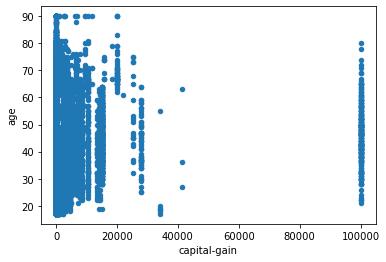

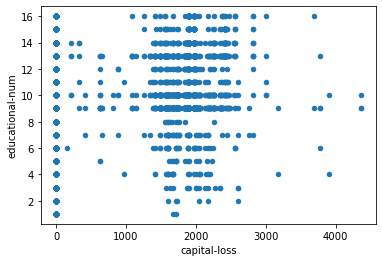

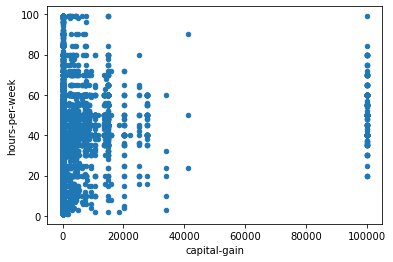

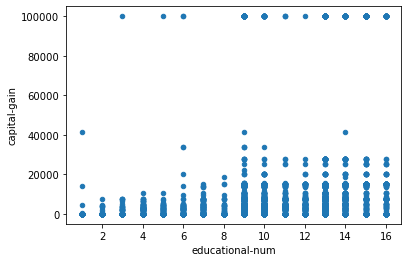

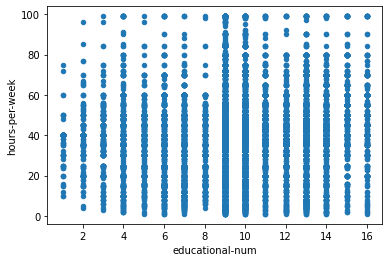

In [373]:
corr = adult.corr().unstack().sort_values(kind="quicksort").drop_duplicates()[-6:-1]
for i in corr.index:
    adult.plot.scatter(x = i[0], y = i[1] )
plt.show()

In [342]:
Y = adult[["income"]]
Y = pd.get_dummies(Y, drop_first = True).values.flatten()

In [324]:
X = pd.get_dummies(adult.drop(['income'],axis = 1)).values


In [343]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2, random_state=42)

In [344]:
Y

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [345]:
lR = LogisticRegression()
lR.fit(X_train, y_train)
y_pred = lR.predict(X_test)

In [362]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.61      0.67      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [363]:
precision_score(y_test,y_pred)

0.737427210164108

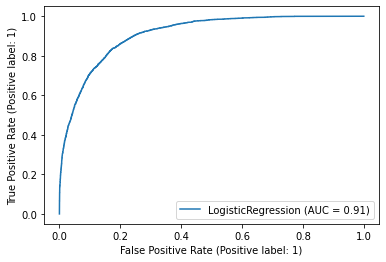

In [364]:
plot_roc_curve(lR, X_test, y_test) 

In [368]:
attr_weight = pd.DataFrame({'attribute':pd.get_dummies(adult.drop(['income'],axis = 1)).columns,'weight': abs(lR.coef_[0])}).sort_values(by = "weight")
print(attr_weight["attribute"].values[:10])
print(attr_weight["attribute"].values[-10:])

['native-country_Guatemala' 'native-country_Haiti' 'native-country_Greece'
 'native-country_Iran' 'race_Other' 'native-country_Cuba'
 'occupation_Craft-repair' 'native-country_Poland' 'native-country_Hong'
 'native-country_?']
['relationship_Own-child' 'capital-loss' 'occupation_Other-service'
 'marital-status_Divorced' 'educational-num' 'hours-per-week' 'age'
 'marital-status_Never-married' 'marital-status_Married-civ-spouse'
 'capital-gain']


In [369]:
attr_weight.head()

,attribute,weight
79,native-country_Guatemala,0.000133
80,native-country_Haiti,0.000669
78,native-country_Greece,0.001939
86,native-country_Iran,0.003445
62,race_Other,0.003501


In [370]:
prob_ad = pd.DataFrame(np.delete(np.append(X_test,lR.predict_proba(X_test), axis = 1),-2, axis = 1)
             ,columns = np.append(pd.get_dummies(adult.drop(['income'],axis = 1)).columns.to_list(),'probability')).sort_values(by = 'probability',ascending = False)
prob_ad.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,probability
4762,1.849433,-0.071079,1.914436,13.274382,-0.217127,1.579946,-0.246558,-0.173795,-0.26194,-0.01431,...,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705,1.0
2470,0.609496,0.032034,2.303397,13.274382,-0.217127,0.772930,-0.246558,-0.173795,-0.26194,-0.01431,...,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705,1.0
7707,0.828308,0.006334,1.914436,13.274382,-0.217127,1.176438,-0.246558,-0.173795,-0.26194,-0.01431,...,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705,1.0
8209,0.828308,-0.089667,2.303397,13.274382,-0.217127,0.772930,-0.246558,-0.173795,-0.26194,-0.01431,...,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705,1.0
3006,1.265933,-0.620505,1.914436,13.274382,-0.217127,0.369421,-0.246558,-0.173795,-0.26194,-0.01431,...,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705,1.0


In [371]:
prob_ad[attr_weight["attribute"].values[-10:]][:10]

,relationship_Own-child,capital-loss,occupation_Other-service,marital-status_Divorced,educational-num,hours-per-week,age,marital-status_Never-married,marital-status_Married-civ-spouse,capital-gain
4762,-0.428641,-0.217127,-0.334803,-0.396417,1.914436,1.579946,1.849433,-0.701782,1.087425,13.274382
2470,-0.428641,-0.217127,-0.334803,-0.396417,2.303397,0.772930,0.609496,-0.701782,1.087425,13.274382
7707,-0.428641,-0.217127,-0.334803,-0.396417,1.914436,1.176438,0.828308,-0.701782,1.087425,13.274382
8209,-0.428641,-0.217127,-0.334803,-0.396417,2.303397,0.772930,0.828308,-0.701782,1.087425,13.274382
3006,-0.428641,-0.217127,-0.334803,-0.396417,1.914436,0.369421,1.265933,-0.701782,1.087425,13.274382
6271,-0.428641,-0.217127,-0.334803,-0.396417,1.914436,0.772930,0.609496,-0.701782,1.087425,13.274382
3525,-0.428641,-0.217127,-0.334803,-0.396417,1.914436,1.579946,0.390683,-0.701782,1.087425,13.274382
8519,-0.428641,-0.217127,-0.334803,-0.396417,2.303397,1.176438,0.025996,-0.701782,1.087425,13.274382
7332,-0.428641,-0.217127,-0.334803,-0.396417,2.303397,-0.356894,-0.046942,-0.701782,1.087425,13.274382
7258,-0.428641,-0.217127,-0.334803,-0.396417,1.914436,0.772930,0.682433,-0.701782,1.087425,13.274382


In [372]:
prob_ad[attr_weight["attribute"].values[-10:]][-10:]

,relationship_Own-child,capital-loss,occupation_Other-service,marital-status_Divorced,educational-num,hours-per-week,age,marital-status_Never-married,marital-status_Married-civ-spouse,capital-gain
5932,2.332956,-0.217127,-0.334803,-0.396417,-0.808297,-0.034087,-1.505691,1.424944,-0.919604,-0.144804
3591,2.332956,-0.217127,-0.334803,-0.396417,-2.364144,-0.034087,-1.141004,1.424944,-0.919604,-0.144804
4999,2.332956,-0.217127,2.986835,-0.396417,-1.586221,-2.777944,-1.578629,1.424944,-0.919604,-0.144804
1359,2.332956,-0.217127,2.986835,-0.396417,-1.197259,-2.939347,-1.505691,1.424944,-0.919604,-0.065093
6648,2.332956,-0.217127,-0.334803,-0.396417,-1.197259,-1.244612,-1.578629,1.424944,-0.919604,-0.144804
9350,-0.428641,-0.217127,-0.334803,-0.396417,-3.142068,-0.034087,1.120058,-0.701782,-0.919604,-0.144804
8761,-0.428641,-0.217127,2.986835,-0.396417,-3.142068,-1.244612,-0.995129,1.424944,-0.919604,-0.144804
3116,2.332956,-0.217127,-0.334803,-0.396417,-1.975183,-2.374435,-1.359816,1.424944,-0.919604,-0.144804
747,2.332956,-0.217127,2.986835,-0.396417,-3.531030,-2.051629,-1.141004,1.424944,-0.919604,-0.144804
8504,-0.428641,-0.217127,-0.334803,-0.396417,-0.419335,-0.437595,-1.359816,-0.701782,-0.919604,-0.144804


In [398]:
countries = [s for s in prob_ad.columns.to_list() if "native-country" in s]
countries + ['hello']

['native-country_?',
 'native-country_Cambodia',
 'native-country_Canada',
 'native-country_China',
 'native-country_Columbia',
 'native-country_Cuba',
 'native-country_Dominican-Republic',
 'native-country_Ecuador',
 'native-country_El-Salvador',
 'native-country_England',
 'native-country_France',
 'native-country_Germany',
 'native-country_Greece',
 'native-country_Guatemala',
 'native-country_Haiti',
 'native-country_Holand-Netherlands',
 'native-country_Honduras',
 'native-country_Hong',
 'native-country_Hungary',
 'native-country_India',
 'native-country_Iran',
 'native-country_Ireland',
 'native-country_Italy',
 'native-country_Jamaica',
 'native-country_Japan',
 'native-country_Laos',
 'native-country_Mexico',
 'native-country_Nicaragua',
 'native-country_Outlying-US(Guam-USVI-etc)',
 'native-country_Peru',
 'native-country_Philippines',
 'native-country_Poland',
 'native-country_Portugal',
 'native-country_Puerto-Rico',
 'native-country_Scotland',
 'native-country_South',
 'na

In [403]:
prob_ad[countries+ ['probability']][:10].mean().abs().sort_values()

native-country_Holand-Netherlands            0.004525
native-country_Hungary                       0.019727
native-country_Honduras                      0.020240
native-country_Scotland                      0.020740
native-country_Outlying-US(Guam-USVI-etc)    0.021705
native-country_Laos                          0.021705
native-country_Yugoslavia                    0.021705
native-country_Trinadad&Tobago               0.023518
native-country_Cambodia                      0.023950
native-country_Thailand                      0.024791
native-country_Hong                          0.024791
native-country_Ireland                       0.027534
native-country_France                        0.027904
native-country_Ecuador                       0.030368
native-country_Peru                          0.030703
native-country_Greece                        0.031690
native-country_Nicaragua                     0.031690
native-country_Iran                          0.034777
native-country_Taiwan       